In [1]:
import pandas as pd
import numpy as np
import theano
import theano.tensor as T

data = pd.read_csv("test_data.csv",header=-1)
[nrow, ncol] = data.shape
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,1,-0.012174,0.876195,-0.821730,0.390792,-0.878678,0.129147,1.372188,-0.334329,-0.296729,...,0.419438,0.513857,0.808871,-0.692646,0.504737,-0.231789,1.492776,0.922141,-0.600025,10.211998
1,2,-0.414593,2.089534,0.767967,-0.531405,-1.267946,-2.167541,1.492074,0.154895,-0.850552,...,0.996180,-0.984347,-1.021569,-0.123840,-1.646673,-1.098993,0.068630,0.833515,-0.046618,-17.977649
2,3,0.518695,0.266402,0.461723,-0.321374,0.404821,0.718711,0.312322,0.872880,0.746390,...,-0.025135,-1.968233,2.028659,0.695655,2.003776,-0.447771,1.747370,-1.616466,-0.032937,3.742127
3,4,-0.270436,2.778741,0.758504,1.569473,-0.691518,0.885353,-0.516506,-0.714972,1.079940,...,0.167137,0.137619,-0.654931,-1.362088,-0.150184,-1.258357,-1.345776,1.409299,1.051374,11.304498
4,5,-0.131126,1.801190,1.631851,-0.357221,1.526107,-1.093846,-2.845149,-1.794031,-0.568017,...,-0.220428,-0.097930,-0.921839,-1.350374,-0.313434,0.621693,-0.267378,-0.060787,0.374508,1.784558


In [47]:
data=np.array(data)
X=data[:,0:42]
Y=data[:,43]
w1=np.random.randn(42,24)
w2=np.random.randn(24,12)
w3=np.random.randn(12,1)
b1=np.random.randn(24)
b2=np.random.randn(12)
b3=np.random.randn(1)

In [37]:
def gradient(X,Y,w1,w2,w3,b1,b2,b3,batchsize,penalty):
    [nrow, ncol] = X.shape 
    index = np.random.choice(range(nrow),size=batchsize,replace=False)
    trainX = X[index,:]
    trainY = np.reshape(Y[index],[batchsize,1])
    x = T.dmatrix('x')
    y = T.dmatrix('y')
    w01 = theano.shared(value = w1, name='w01',borrow=True)
    w12 = theano.shared(value = w2, name='w12',borrow=True)
    w23 = theano.shared(value = w3, name='w23',borrow=True)
    b01 = theano.shared(value = b1, name='b01',borrow=True)
    b12 = theano.shared(value = b2, name='b12',borrow=True)
    b23 = theano.shared(value = b3, name='b23',borrow=True)
    L01_temp = T.dot(x, w01) + b01
    L01 = L01_temp*(L01_temp>0)
    L12 = T.dot(L01, w12) + b12 
    L23 = T.dot(L12, w23) + b23
    loss = T.mean((y-L23)**2)  
    cost = loss.mean + penalty * ((w01**2).sum() + (w12**2).sum()+(w23**2).sum())  ## L2 penalty
    dw1 = T.grad(cost=cost, wrt=w01)
    dw2 = T.grad(cost=cost, wrt=w12)
    dw3 = T.grad(cost=cost, wrt=w23)
    db1 = T.grad(cost=cost, wrt=b01)
    db2 = T.grad(cost=cost, wrt=b12)
    db3 = T.grad(cost=cost, wrt=b23)    
    train = theano.function(inputs=[x,y], outputs=[dw1,dw2,dw3,db1,db2,db3],name='train')
    gw1,gw2,gw3,gb1,gb2,gb3=train(trainX,trainY)
    return [gw1,gw2,gw3,gb1,gb2,gb3]

In [78]:
def lossfunc(X,Y,w1,w2,w3,b1,b2,b3):
    Y=np.reshape(Y,[X.shape[0],1])
    L01_temp = np.dot(X, w1) + b1
    L01 = L01_temp*(L01_temp>0)
    L12 = np.dot(L01, w2) + b2 
    L23 = np.dot(L12, w3) + b3
    loss = np.mean((Y-L23)**2)  
    return loss

In [85]:
loss_vec=[]
w1=np.random.randn(42,24)
w2=np.random.randn(24,12)
w3=np.random.randn(12,1)
b1=np.random.randn(24)
b2=np.random.randn(12)
b3=np.random.randn(1)

for i in range(100):
    if i<10:
        eta=0.0000001
    else:
        eta=0.000001
    gw1,gw2,gw3,gb1,gb2,gb3=gradient(X,Y,w1,w2,w3,b1,b2,b3,500,1)
    w1=w1-eta*gw1
    w2=w2-eta*gw2
    w3=w3-eta*gw3
    b1=b1-eta*gb1
    b2=b2-eta*gb2
    b3=b3-eta*gb3
    loss=lossfunc(X,Y,w1,w2,w3,b1,b2,b3)
    loss_vec.append(loss)

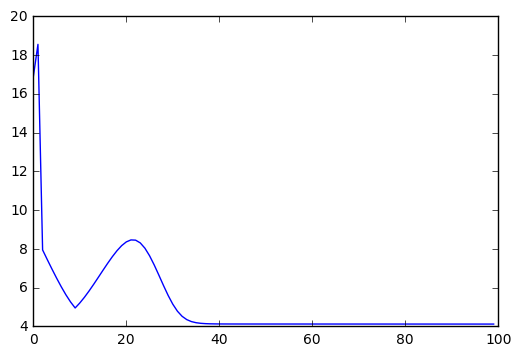

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(100),np.log(loss_vec))